In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import seaborn as sns
# %matplotlib tk

In [7]:
# data = "../data/ident_wheels_real_indoor.csv"
data = "../data/robot_data.csv"

In [8]:
width, height = (10,10)

In [9]:
df = pd.read_csv(data,header=None, names=['wheel_l','wheel_r','beta_l','beta_r','alpha', 'i', 'j'])

In [10]:
df

,wheel_l,wheel_r,beta_l,beta_r,alpha,i,j
0,4.575942,5.351428,-0.076119,-0.031383,0.000000,1.0,3.0
1,5.860082,7.309856,-0.001576,0.114608,0.000000,1.0,4.0
2,42.154892,43.131904,3.174376,3.258004,0.000000,3.0,7.0
3,10.617283,12.786990,0.145398,0.330255,0.000000,7.0,8.0
4,10.564405,13.211480,0.592272,0.818528,0.000000,9.0,6.0
...,...,...,...,...,...,...,...
1570,4.633396,5.819519,-0.005830,0.006328,0.000000,1.0,5.0
1571,8.876577,9.583209,-0.003399,0.003440,0.000000,4.0,7.0
1572,5.177236,5.906063,-0.003644,0.003538,0.000000,8.0,7.0
1573,2.541247,4.529540,-0.012140,0.010359,-0.020061,9.0,6.0


In [12]:
x = df[['i','j']].values
y = df[['beta_l','beta_r','alpha']].values

In [13]:
def generate_grid_plot(width, height, param):
    terrain_matrix = [[[] for j in range(width)] for i in range(height)]
    df.apply(lambda x: terrain_matrix[int(x.i)][int(x.j)].append(x[param]), axis=1)

    min_val = 0
    max_val = 0

    for i in range(height):
        for j in range(width):
            if len(terrain_matrix[i][j]):
                mean = np.mean(terrain_matrix[i][j])
            else:
                mean = 0

            if mean > max_val:
                max_val = mean
            
            if mean < min_val:
                min_val = mean

            terrain_matrix[i][j] = mean

    side = max(abs(min_val), abs(max_val))

    plt.matshow(terrain_matrix, vmin=-side, vmax=side, cmap='bwr')
    plt.title(param)
    plt.colorbar()
    plt.savefig(f'../data/{param}.jpg')
    plt.show()
            

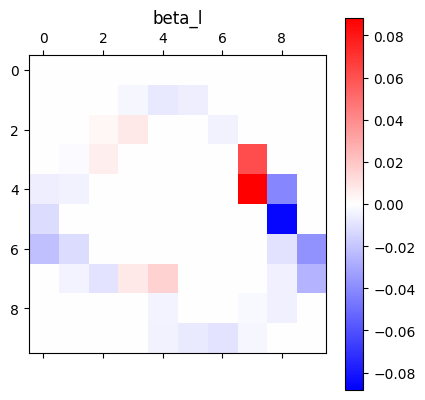

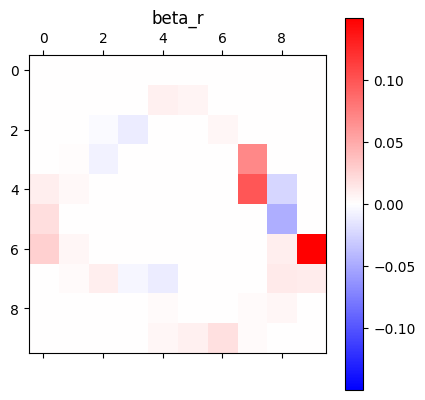

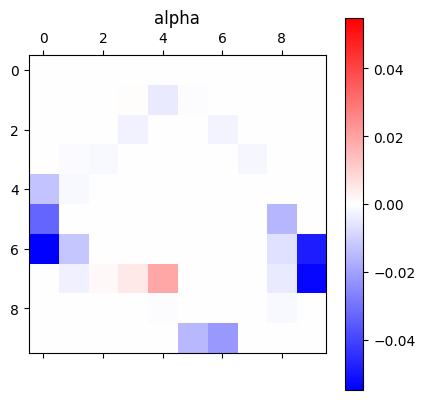

In [14]:
plt.close('all')
generate_grid_plot(width, height, 'beta_l')
generate_grid_plot(width, height, 'beta_r')
generate_grid_plot(width, height, 'alpha')

In [15]:
x = df[['wheel_l','wheel_r']].values
y = df[['beta_l','beta_r','alpha']].values

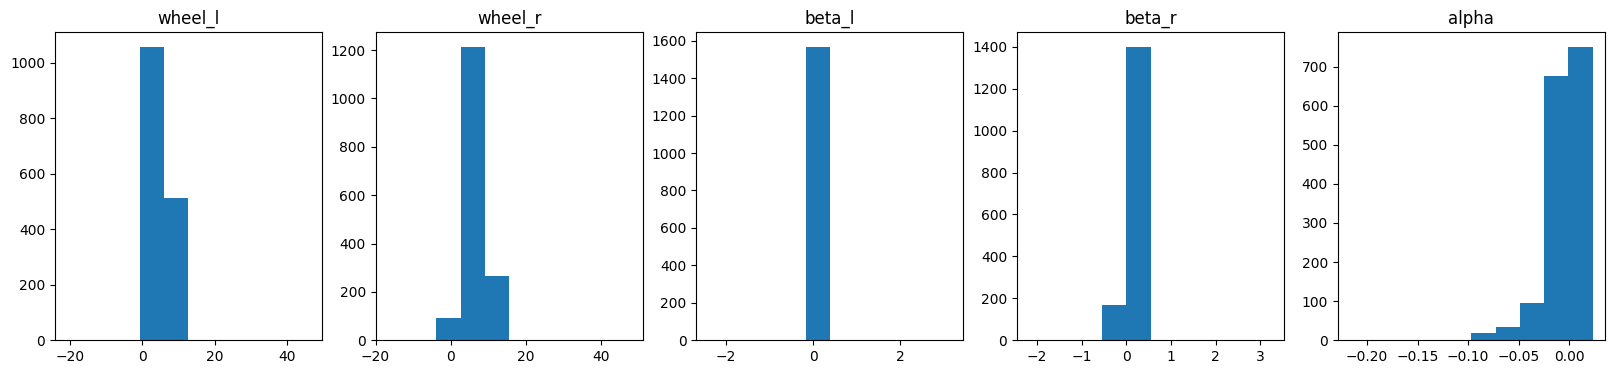

In [16]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
ax[0].hist(x[..., 0])
ax[0].set_title('wheel_l')
ax[1].hist(x[..., 1])
ax[1].set_title('wheel_r')
# %% plot histogram to see if output distribution is well behaved, to see if it is neeeded a scaling
ax[2].hist(y[..., 0])
ax[2].set_title('beta_l')
ax[3].hist(y[..., 1])
ax[3].set_title('beta_r')
ax[4].hist(y[..., 2])
ax[4].set_title('alpha')
plt.show()

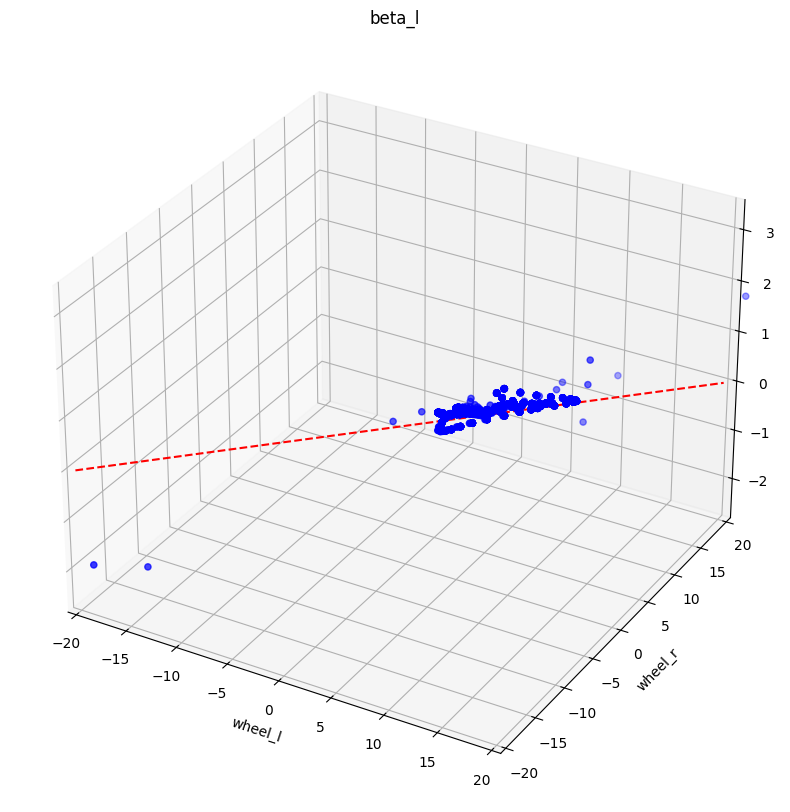

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot([-20,20],[-20,20],[0,0], "--", color="red")
ax.scatter(x[..., 0], x[..., 1], y[..., 0], color='blue')
ax.set_title('beta_l')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
plt.show()

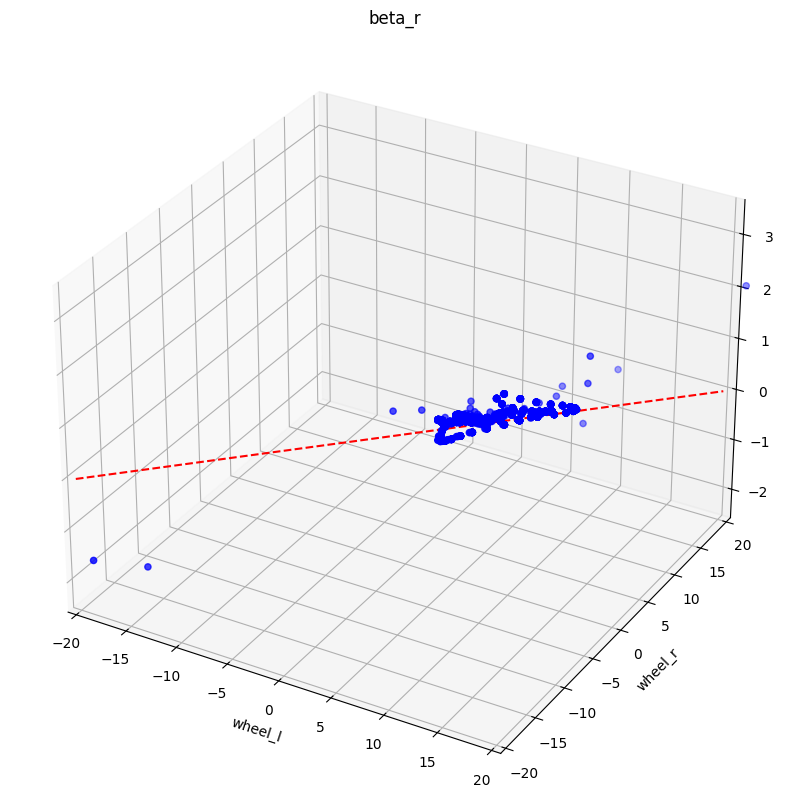

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot([-20,20],[-20,20],[0,0], "--", color="red")
ax.scatter(x[..., 0], x[..., 1], y[..., 1], color='blue')
ax.set_title('beta_r')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
plt.show()

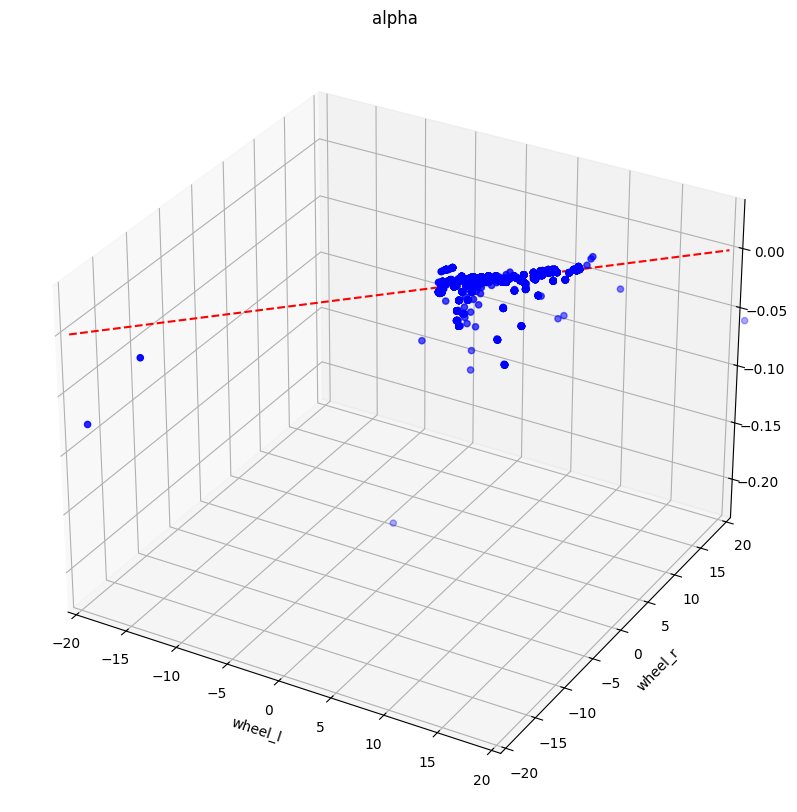

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot([-20,20],[-20,20],[0,0], "--", color="red")
ax.scatter(x[..., 0], x[..., 1], y[..., 2], color='blue')
ax.set_title('alpha')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
plt.show()